# Combining DataFrames with Pandas

## Objectives
* Combine data from multiple files into a single data frame using merge and concat
* combine two dataframes using a unique ID found in both dataframes
* employ 'to_csv' to export a dataframe in csv format
* join dataframes using common fields (join keys).

In [6]:
import pandas as pd
import os as os

pwd = os.getcwd()
print(pwd)

os.chdir('/home/meelyn/Documents/cloud_development/sw-python-ecology-lesson')
# os.chdir('../')

# import surveys and species data
surveys_df = pd.read_csv('data/surveys.csv',
                         keep_default_na=False, na_values=[""]) # can tell pandas how to deal with na values

species_df = pd.read_csv('data/species.csv',
                         keep_default_na=False, na_values=[""])
print(species_df)

/home/meelyn/Documents/cloud_development/sw-python-ecology-lesson
   species_id             genus          species     taxa
0          AB        Amphispiza        bilineata     Bird
1          AH  Ammospermophilus          harrisi   Rodent
2          AS        Ammodramus       savannarum     Bird
3          BA           Baiomys          taylori   Rodent
4          CB   Campylorhynchus  brunneicapillus     Bird
5          CM       Calamospiza      melanocorys     Bird
6          CQ        Callipepla         squamata     Bird
7          CS          Crotalus       scutalatus  Reptile
8          CT     Cnemidophorus           tigris  Reptile
9          CU     Cnemidophorus        uniparens  Reptile
10         CV          Crotalus          viridis  Reptile
11         DM         Dipodomys         merriami   Rodent
12         DO         Dipodomys            ordii   Rodent
13         DS         Dipodomys      spectabilis   Rodent
14         DX         Dipodomys              sp.   Rodent
15    

# Concatenating Data Frames

## we can use the concate function in pandas to append either columns or rows from one dataframe to another

In [7]:
# read the first 10 lines of surveys tables
survey_sub = surveys_df.head(10)
print('survey sub\n', survey_sub)

# Grab the last 10 rows
survey_sub_last10 = surveys_df.tail(10)
print('survey sub last 10\n', survey_sub_last10)

# reset the index values to the second dataframe appends poorly
survey_sub_last10 = survey_sub_last10.reset_index(drop=True)
# drop=True option avoids adding new index column with old index values i.e. the row numbers
print('survey sub last 10 with new index\n', survey_sub_last10)

survey sub
    record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
0          1      7   16  1977        2         NL   M             32.0   
1          2      7   16  1977        3         NL   M             33.0   
2          3      7   16  1977        2         DM   F             37.0   
3          4      7   16  1977        7         DM   M             36.0   
4          5      7   16  1977        3         DM   M             35.0   
5          6      7   16  1977        1         PF   M             14.0   
6          7      7   16  1977        2         PE   F              NaN   
7          8      7   16  1977        1         DM   M             37.0   
8          9      7   16  1977        1         DM   F             34.0   
9         10      7   16  1977        6         PF   F             20.0   

   weight  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
5     NaN  
6     NaN  
7     NaN  
8     NaN  
9     NaN  
survey sub last 10
        rec

In [8]:
# when we concatenate data frames we need to specify the axis
## axis = 0 tells pandas to stack the second dataframe under the first one
### need to make sure both dataframes have the same columns and associated column format in both datasets

## axis = 1 will stack the columns in the second dataframe to the right of the first dataframe
### stack horizontally we want to make sure what we are doing makes sense

# Stack dataframes on top of each other
vertical_stack = pd.concat([survey_sub, survey_sub_last10], axis=0)
print('vertical stack\n', vertical_stack)

# Place dataframes side by side
horizontal_stack = pd.concat([survey_sub, survey_sub_last10])
print('\nhorizontal stack\n', pd.concat([survey_sub, survey_sub_last10], axis=1))

vertical stack
    record_id  month  day  year  plot_id species_id  sex  hindfoot_length  \
0          1      7   16  1977        2         NL    M             32.0   
1          2      7   16  1977        3         NL    M             33.0   
2          3      7   16  1977        2         DM    F             37.0   
3          4      7   16  1977        7         DM    M             36.0   
4          5      7   16  1977        3         DM    M             35.0   
5          6      7   16  1977        1         PF    M             14.0   
6          7      7   16  1977        2         PE    F              NaN   
7          8      7   16  1977        1         DM    M             37.0   
8          9      7   16  1977        1         DM    F             34.0   
9         10      7   16  1977        6         PF    F             20.0   
0      35540     12   31  2002       15         PB    F             26.0   
1      35541     12   31  2002       15         PB    F             24.0

In [9]:
# in the vertial stack dataframe the row indexes for the two dataframes are repeated. we can reindex the new dataframe using the reset_index() method
vertical_stack_reindex = vertical_stack.reset_index()
print(vertical_stack_reindex)

    index  record_id  month  day  year  plot_id species_id  sex  \
0       0          1      7   16  1977        2         NL    M   
1       1          2      7   16  1977        3         NL    M   
2       2          3      7   16  1977        2         DM    F   
3       3          4      7   16  1977        7         DM    M   
4       4          5      7   16  1977        3         DM    M   
5       5          6      7   16  1977        1         PF    M   
6       6          7      7   16  1977        2         PE    F   
7       7          8      7   16  1977        1         DM    M   
8       8          9      7   16  1977        1         DM    F   
9       9         10      7   16  1977        6         PF    F   
10      0      35540     12   31  2002       15         PB    F   
11      1      35541     12   31  2002       15         PB    F   
12      2      35542     12   31  2002       15         PB    F   
13      3      35543     12   31  2002       15         PB    

### Writing out data to csv
* We can use the 'to_csv" command to export a dataframe in csv format.

In [10]:
vertical_stack.to_csv('data/out.csv', index=False)

In [11]:
# import the out.csv file back into python to make sure everything is ok
new_output = pd.read_csv('data/out.csv', keep_default_na=False, na_values=[""])
# keep_default_na=False and na_values used to deal with NaN values
print(new_output)
# importing from csv re indexes rows?

    record_id  month  day  year  plot_id species_id  sex  hindfoot_length  \
0           1      7   16  1977        2         NL    M             32.0   
1           2      7   16  1977        3         NL    M             33.0   
2           3      7   16  1977        2         DM    F             37.0   
3           4      7   16  1977        7         DM    M             36.0   
4           5      7   16  1977        3         DM    M             35.0   
5           6      7   16  1977        1         PF    M             14.0   
6           7      7   16  1977        2         PE    F              NaN   
7           8      7   16  1977        1         DM    M             37.0   
8           9      7   16  1977        1         DM    F             34.0   
9          10      7   16  1977        6         PF    F             20.0   
10      35540     12   31  2002       15         PB    F             26.0   
11      35541     12   31  2002       15         PB    F             24.0   

In [12]:
# Challenge Combine Data
surveys2001 = pd.read_csv('data/surveys2001.csv', keep_default_na=False, na_values=[""])
surveys2002 = pd.read_csv('data/surveys2002.csv', keep_default_na=False, na_values=[""])

print('surveys2001\n', surveys2001)
print('surveys2002\n', surveys2002)

surveys2001_2002 = pd.concat([surveys2001, surveys2002], axis=0).reset_index()
print('surveys concatenated\n', surveys2001_2002)
surveys2001_2002.to_csv('data/surveys2001_2002', index=True)

surveys2001_2002_reuploaded = pd.read_csv('data/surveys2001_2002', keep_default_na=False, na_values=[""])

print('reuploaded surveyts\n', surveys2001_2002_reuploaded)

surveys2001
       Unnamed: 0  record_id  month  day  year  site_id species_id sex  \
0          31710      31711      1   21  2001        1         PB   F   
1          31711      31712      1   21  2001        1         DM   M   
2          31712      31713      1   21  2001        1         PB   M   
3          31713      31714      1   21  2001        1         DO   M   
4          31714      31715      1   21  2001        2         OT   M   
...          ...        ...    ...  ...   ...      ...        ...  ..   
1429       33303      33304     12   15  2001       24         RM   M   
1430       33304      33305     12   15  2001        7         PB   M   
1431       33305      33306     12   15  2001        7         OT   M   
1432       33306      33307     12   15  2001        7         OT   M   
1433       33307      33308     12   15  2001        7         PP   M   

      hindfoot_length  weight  
0                26.0    25.0  
1                37.0    43.0  
2             

### Joining Dataframes

Another way to combine dataframes is to use columns in each dataset that contain common values ( common unique identifier). This is called "joining". The columns containing the common values are called "join key(s)".

In [13]:
# grab the first 10 lines of our data as a subset to work with. use the .head() method
# read in first 10 lines of surveys table
survey_sub = surveys_df.head(10)
print('\n survey sub\n', survey_sub)

# import a small subset of the species data designed for this part of the lesson
species_sub = pd.read_csv('data/speciesSubset.csv', keep_default_na=False, na_values=[""])
print('species sub\n', species_sub)


 survey sub
    record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
0          1      7   16  1977        2         NL   M             32.0   
1          2      7   16  1977        3         NL   M             33.0   
2          3      7   16  1977        2         DM   F             37.0   
3          4      7   16  1977        7         DM   M             36.0   
4          5      7   16  1977        3         DM   M             35.0   
5          6      7   16  1977        1         PF   M             14.0   
6          7      7   16  1977        2         PE   F              NaN   
7          8      7   16  1977        1         DM   M             37.0   
8          9      7   16  1977        1         DM   F             34.0   
9         10      7   16  1977        6         PF   F             20.0   

   weight  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
5     NaN  
6     NaN  
7     NaN  
8     NaN  
9     NaN  
species sub
   species_id   

In [14]:
# identifying join keys, i.e. keys that are shared by both dataframes
print(species_sub.columns) # prints species sub dataframe columns
print(survey_sub.columns) # prints survey sub dataframe columns
# matching column name is species_id

Index(['species_id', 'genus', 'species', 'taxa'], dtype='object')
Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')


In [15]:
# inner joins combines two dataframes based on a join key and returns a new dataframe that contains only those rows that have matching values in both of the original dataframes
# inner joins using pandas .merge method, inner join is default option
merged_inner = pd.merge(left=survey_sub, right=species_sub, left_on='species_id', right_on='species_id') # on is the join key
print('merged inner\n', merged_inner)


merged inner
    record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
0          1      7   16  1977        2         NL   M             32.0   
1          2      7   16  1977        3         NL   M             33.0   
2          3      7   16  1977        2         DM   F             37.0   
3          4      7   16  1977        7         DM   M             36.0   
4          5      7   16  1977        3         DM   M             35.0   
5          7      7   16  1977        2         PE   F              NaN   
6          8      7   16  1977        1         DM   M             37.0   
7          9      7   16  1977        1         DM   F             34.0   

   weight       genus   species    taxa  
0     NaN     Neotoma  albigula  Rodent  
1     NaN     Neotoma  albigula  Rodent  
2     NaN   Dipodomys  merriami  Rodent  
3     NaN   Dipodomys  merriami  Rodent  
4     NaN   Dipodomys  merriami  Rodent  
5     NaN  Peromyscus  eremicus  Rodent  
6     NaN   Dipo

In [19]:
# merge two dataframes with left joins
# want to add info from the species_sub to the survey_sub without losing any info from the survey_sub
## left join will return all of the rows from the left dataframe
## left join will discard rows from the right datafram that do not have values for the join keys

merged_left = pd.merge(left=survey_sub, right=species_sub, how='left', left_on='species_id', right_on='species_id')
print('merged left\n', merged_left) # merged_left contains same number of rows as survey_sub

print('missing species values\n', merged_left[merged_left['genus'].isna()]) # dataframe contains rows with missing genus, species, and taxa values

merged left
    record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
0          1      7   16  1977        2         NL   M             32.0   
1          2      7   16  1977        3         NL   M             33.0   
2          3      7   16  1977        2         DM   F             37.0   
3          4      7   16  1977        7         DM   M             36.0   
4          5      7   16  1977        3         DM   M             35.0   
5          6      7   16  1977        1         PF   M             14.0   
6          7      7   16  1977        2         PE   F              NaN   
7          8      7   16  1977        1         DM   M             37.0   
8          9      7   16  1977        1         DM   F             34.0   
9         10      7   16  1977        6         PF   F             20.0   

   weight       genus   species    taxa  
0     NaN     Neotoma  albigula  Rodent  
1     NaN     Neotoma  albigula  Rodent  
2     NaN   Dipodomys  merriami  Ro

### Other join types
* right - invoked by passing how='right', all rows from right dataframe
* full - invoked by passing how='outer', returns all pairwise combos of rows from both dataframes
* self-join - joins a data frame with itself., useful when you want to compare records within the same dataset based on a given criteria

stacked plot
 Axes(0.125,0.11;0.775x0.77)
individual taxa
 Axes(0.125,0.11;0.775x0.77)


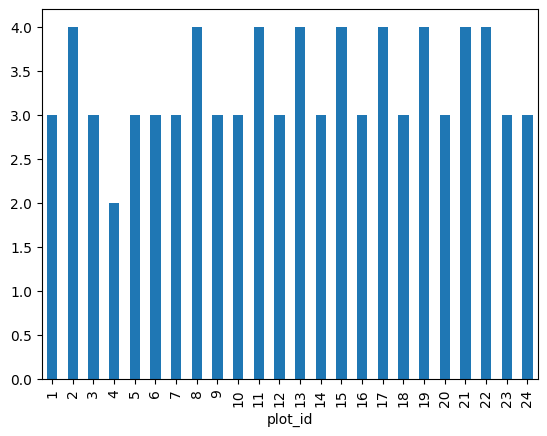

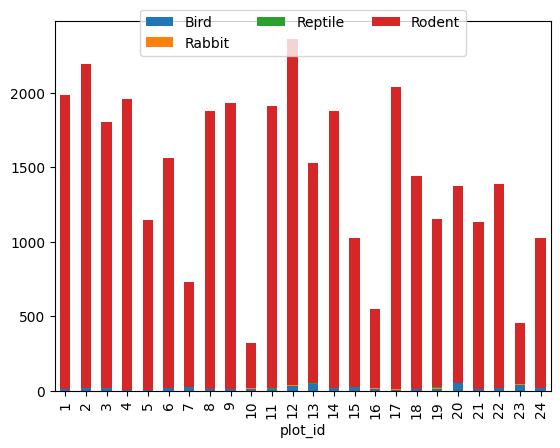

In [40]:
# Challenge - Distributions
## create a new dataframe by joining the contents of the surveys.csv and species.csv tables. Then calculate and plot the distribution of
#1. Taxa by plot
#2. taxa by sex by plot

#1.
species_df = pd.read_csv('data/species.csv', keep_default_na=False, na_values=[""])
# print(species_df)
taxa_plot = pd.merge(left=surveys_df, right=species_df, how='left', on='species_id')
# print('taxa plot\n', taxa_plot,'\n')

taxa_plot_graph = taxa_plot.groupby(['plot_id'])['taxa'].nunique().plot(kind='bar')
print('stacked plot\n', taxa_plot_graph)

# plot the number of individuals of each taxa in each plot
ind_taxa = taxa_plot.groupby(['plot_id', 'taxa']).count()['record_id'].unstack().plot(kind='bar', stacked=True)
ind_taxa.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))
print('individual taxa\n', ind_taxa)



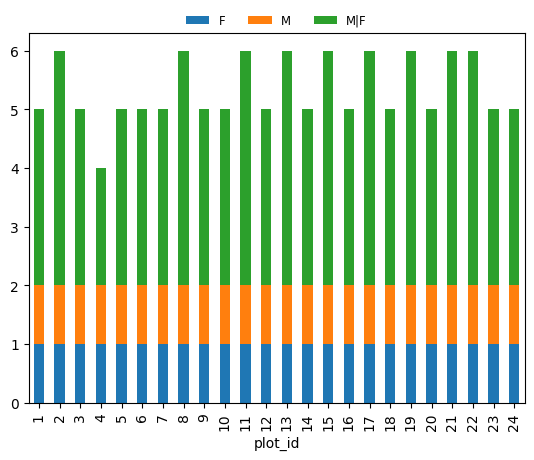

In [45]:
# merged plot by taxa with sex
taxa_plot.loc[taxa_plot['sex'].isnull(), 'sex'] = 'M|F' # turns null values into M|F category representing male or female
ntaxa_sex_site = taxa_plot.groupby(['plot_id', 'sex'])['taxa'].nunique().reset_index(level=1) # count number of unique taxa based on plot id and sex
ntaxa_sex_site = ntaxa_sex_site.pivot_table(values='taxa', columns='sex', index=ntaxa_sex_site.index) # pivot table?
plt = ntaxa_sex_site.plot(kind='bar', legend=False, stacked=True) # prints stacked bar graph

plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.08), fontsize='small', frameon=False)
# print(ntaxa_sex_site)

# taxa_sex_plot = taxa_plot.groupby(['plot_id', 'sex'])['taxa'].nunique().plot(kind='bar')
# print('plot id and sex\n', taxa_sex_plot)
